In [5]:
# !pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org Ipython

In [194]:
# pip install -U notebook-as-pdf

In [4]:
from IPython.display import display, Latex
from IPython.display import Image
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector


import numpy as np
import warnings

# warnings.filterwarnings("ignore", category=DepriciationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Protocolo de teleporte quântico

<center><img src="teleporte.jpeg" width="800"></center>




<div class="alert alert-block alert-info">
    

Passos do protocolo:

</div>



0. Estado inicial do sistema:

$$\vert \phi_0 \rangle = \vert 00 \rangle_{Alice} \otimes \vert 0 \rangle_{Bob}$$

1. Alice prepara o estado quântico $\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle $

$$\vert \psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$$

O estado é atualizado para: 

$$\vert \phi_1 \rangle = [\alpha \vert 00 \rangle + \beta \vert 10 \rangle]_{Alice} \otimes \vert 0 \rangle_{Bob}$$

2. Alice e Bob possuem um estado emaranhado entre eles:

$$\vert \psi_{A B} \rangle = \frac{1}{\sqrt{2}} \left[ \vert 00 \rangle + \vert 11 \rangle\right]$$

O estado atualizado é:

$$\vert \phi_2 \rangle = \left[\alpha \vert 0 \rangle + \beta \vert 1\rangle \right]\otimes \vert \psi_{AB} \rangle$$

$$\vert \phi_2 \rangle = \frac{1}{\sqrt{2}}\left[\alpha \vert 0 \rangle + \beta \vert 1\rangle \right]\otimes \left[\vert 00 \rangle + \vert 11 \rangle \right]$$

$$\vert \phi_2 \rangle = \frac{1}{\sqrt{2}}\left[\alpha\vert 0\rangle \otimes \left( \vert 00 \rangle + \vert 11 \rangle\right) + \beta\vert 1 \rangle \otimes\left( \vert 00 \rangle + \beta \vert 11 \rangle\right) \right]$$


3. Aplicar Hadamar no primeiro qubit da  Alice ($q_0$):

$$\vert \phi_3 \rangle = \frac{1}{2}\left[\alpha (\vert 0\rangle + \vert 1 \rangle) \otimes \left( \vert 00 \rangle + \vert 11 \rangle\right) + \beta (\vert 0 \rangle - \vert 1 \rangle) \otimes\left( \vert 00 \rangle + \beta \vert 11 \rangle\right) \right]$$


Ficamos com:


$$\vert \phi_3 \rangle = \frac{1}{2}\left[\alpha\vert 000\rangle + \alpha\vert 011 \rangle + \alpha\vert 100 \rangle + \alpha\vert 111 \rangle + \\ 
\beta\vert 000 \rangle + \beta\vert 011\rangle - \beta\vert 100 \rangle - \beta\vert 111 \rangle \right]$$


Reorganizando temos:

$$\vert \phi_3 \rangle = \frac{1}{2}\left[\vert 00\rangle \otimes (\alpha \vert 0 \rangle + \beta \vert 1 \rangle) + \\
   \vert 01\rangle \otimes (\alpha \vert 1 \rangle + \beta \vert 0 \rangle) + \\
   \vert 10\rangle \otimes (\alpha \vert 0 \rangle - \beta \vert 1 \rangle) + \\ 
   \vert 11\rangle \otimes (\alpha \vert 1 \rangle - \beta \vert 0 \rangle) \right]$$

4. Alice faz uma medição em seus estados e pode obter como resultado os seguintes

$$\vert 00 \rangle, \vert 01 \rangle, \vert 10 \rangle \text{ ou } \vert 11 \rangle$$


O resultado da medida da Alice irá definir se Bob precisará ou não fazer uma correção para medir o estado.



00 $\rightarrow$ ele não faz nada

01 $\rightarrow$ aplica $X$ gate

10 $\rightarrow$ aplica $Z$ gate

11 $\rightarrow$ aplica $ZX$ gate





# Visualização de estados quânticos

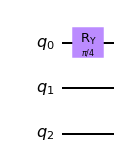

In [5]:

qc = QuantumCircuit(3)
qc.ry (np.pi/4, 0) # optional, we want to transfer state 1 in this example
save = Statevector.from_instruction(qc)
qc.draw('mpl')


A atuação de $R_y$ é dada por:

$$ R_y(\theta) \vert 0 \rangle = \displaystyle e^{\frac{-i \theta}{2}} \vert 0 \rangle$$

Para $\theta = \pi/4$ temos:


<div class="alert alert-block alert-info">
O Estado deles acima é dado por:
    
$$\vert \psi \rangle = \left[ \cos\frac{\pi}{8} \vert 0 \rangle + \sin\frac{\pi}{8} \vert 1 \rangle \right] \otimes \vert 00 \rangle$$

    
$$\vert \psi \rangle = \cos{\pi/8} \vert 000 \rangle + \sin{\pi/8} \vert 100 \rangle$$
    
</div>


Onde o ordenamento dos qubits é dado por:

$$ \vert \psi \rangle = \vert q_0\rangle \otimes \vert q_1 \rangle \otimes \vert q_2 \rangle$$


$$\vert \psi\rangle = \begin{bmatrix} 000 \\ 100 \\ 010 \\ 110 \\ 001 \\101 \\ 011 \\ 111  \end{bmatrix}  = \begin{bmatrix} 0.92388 \\ 0.38268 \\ 0 \\ 0 \\ 0 \\0 \\ 0 \\ 0  \end{bmatrix} $$


<div class="alert alert-block alert-info">
No estado acima o resultado da medição da Alice foi $00$
    
E a amplitude é acima é dada por 

$$\alpha = \cos \frac{\pi}{8}$$
    
$$\beta = \sin \frac{\pi}{8}$$

</div>




Mostrando a posiçao de cada qubit na esfera de Bloch

Amplitudes alpha e beta são: [0.85355 0.14645]


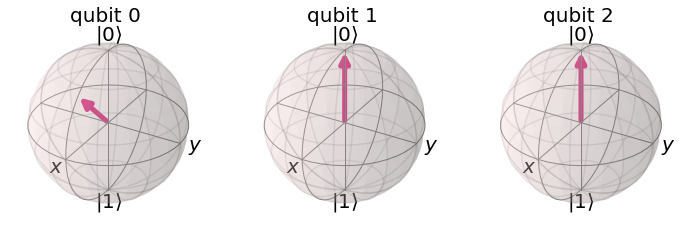

In [6]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, backend= simulator, shots = 100000).result().get_statevector()

print(f'Amplitudes alpha e beta são: [{np.round(np.cos(np.pi/8)**2,5)} {np.round(np.sin(np.pi/8)**2,5)}]')


plot_bloch_multivector(result)


$$\vert q_0 \rangle = \cos\frac{\pi}{8} \vert 0 \rangle + \sin\frac{\pi}{8} \vert 1 \rangle $$
$$\vert q_1 \rangle = \vert 0 \rangle $$
$$\vert q_2 \rangle = \vert 0 \rangle $$

# Protocolo



Construindo o circuito abaixo:

<center><img src="teleporte.jpeg" width="800"></center>



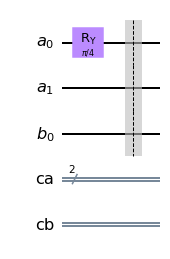

In [7]:
alice = QuantumRegister(2, 'a')
bob = QuantumRegister(1,'b')
cr_alice = ClassicalRegister(2, 'ca')
cr_bob = ClassicalRegister(1,'cb')

qc = QuantumCircuit(alice,bob,cr_alice, cr_bob)

qc.ry(np.pi/4, alice[0]) # optional, we want to transfer state 1 in this example
qc.barrier()
qc.draw('mpl')

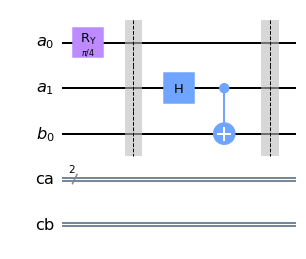

In [8]:
qc.h(alice[1])
qc.cx(alice[1],bob[0])
qc.barrier()
qc.draw('mpl')

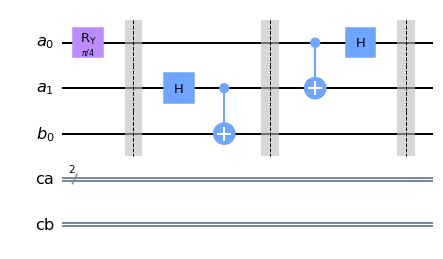

In [9]:
qc.cx(alice[0],alice[1])
qc.h(alice[0])

qc.barrier()

qc.draw('mpl')

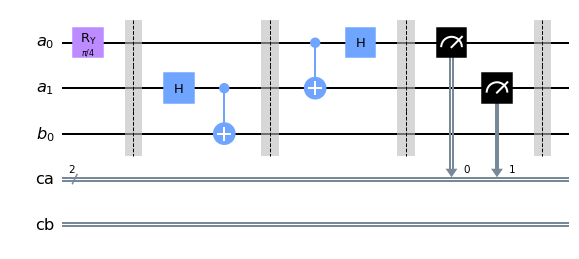

In [10]:
qc.measure(alice, cr_alice)
qc.barrier()
qc.draw('mpl')

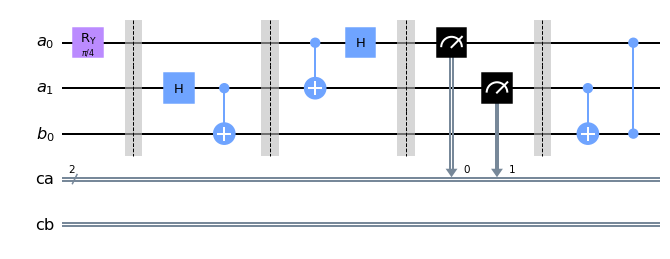

In [171]:
qc.cx(alice[1], bob[0])
qc.cz(alice[0], bob[0])
# qc.measure(bob, cr_bob)


qc.draw('mpl')

### Resultado State Vector

In [177]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, backend= simulator, shots = 10000).result().get_statevector()
# plot_histogram(result)
states = [format(i,'0'+str(n)+'b')[::-1] for i in range(2**n)]

print(states)
res = [round(i.real, 5) for i in result]
array_to_latex(result)

['000', '100', '010', '110', '001', '101', '011', '111']


<IPython.core.display.Latex object>

In [178]:
n = 3
states = [format(i,'0'+str(n)+'b')[::-1] for i in range(2**n)]

medida = [(j,i) for i,j in zip(res,states) if i >  0]

print(f'\n\nAlice mediu {medida[0][0][:2]} o estado que está com Bob é [{medida[0][1]} {medida[1][1]}]\n\n')



Alice mediu 10 o estado que está com Bob é [0.92388 0.38268]




### Plotando resultado na Bloch Sphere antes e depois do protocolo

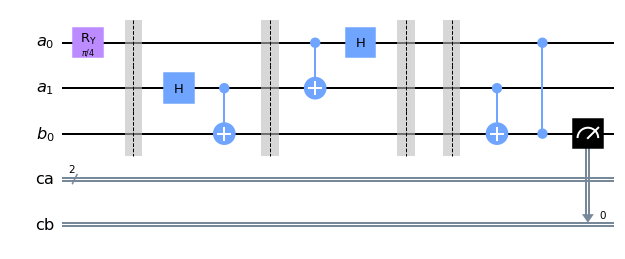

In [183]:
alice = QuantumRegister(2, 'a')
bob = QuantumRegister(1,'b')
cr_alice = ClassicalRegister(2, 'ca')
cr_bob = ClassicalRegister(1,'cb')

qc = QuantumCircuit(alice,bob,cr_alice, cr_bob)

qc.ry(np.pi/4, alice[0]) # optional, we want to transfer state 1 in this example
qc.barrier()
save1 = Statevector.from_instruction(qc)


qc.h(alice[1])
qc.cx(alice[1],bob[0])
qc.barrier()


qc.cx(alice[0],alice[1])
qc.h(alice[0])

qc.barrier()


# qc.measure(alice, cr_alice)
qc.barrier()

qc.cx(alice[1], bob[0])
qc.cz(alice[0], bob[0])
save2 = Statevector.from_instruction(qc)


qc.measure(bob, cr_bob)


qc.draw('mpl')

### No início $\vert \psi \rangle$ está em posse da Alice

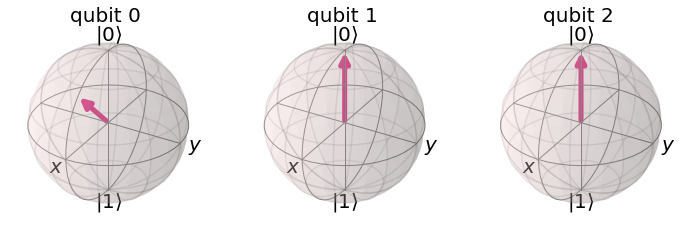

In [184]:
plot_bloch_multivector(save1)

### Ao término do protocolo $\vert \psi \rangle$ está em posse de Bob

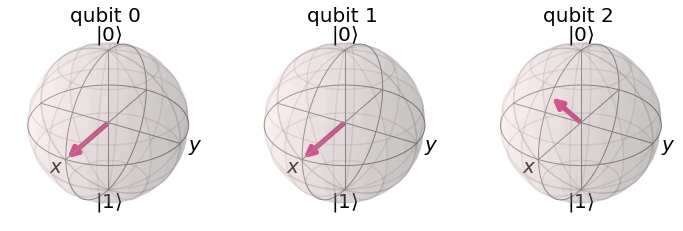

In [185]:
plot_bloch_multivector(save2)

### Gerando a visão de histograma

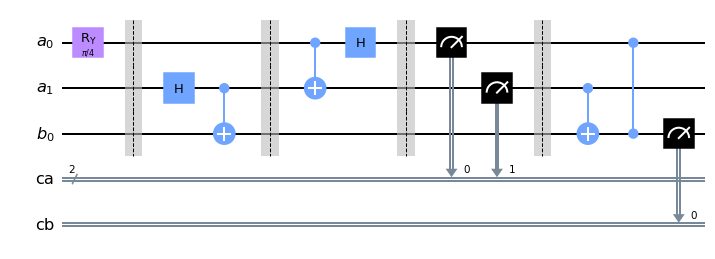

In [189]:
alice = QuantumRegister(2, 'a')
bob = QuantumRegister(1,'b')
cr_alice = ClassicalRegister(2, 'ca')
cr_bob = ClassicalRegister(1,'cb')

qc = QuantumCircuit(alice,bob,cr_alice, cr_bob)

qc.ry(np.pi/4, alice[0]) # optional, we want to transfer state 1 in this example
qc.barrier()


qc.h(alice[1])
qc.cx(alice[1],bob[0])
qc.barrier()


qc.cx(alice[0],alice[1])
qc.h(alice[0])

qc.barrier()


qc.measure(alice, cr_alice)
qc.barrier()

qc.cx(alice[1], bob[0])
qc.cz(alice[0], bob[0])


qc.measure(bob, cr_bob)


qc.draw('mpl')

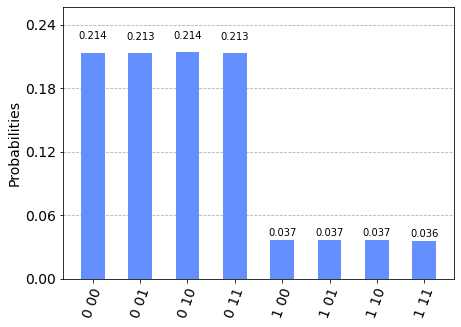

In [190]:
simulator = Aer.get_backend('qasm_simulator')
shots = 100000
result = execute(qc, backend=simulator, shots=shots).result().get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(result)

### Pós processamento de informação

In [47]:
prob0 = 0
prob1 = 0



for i in result.keys():
    if i[0] == '0':
        prob0+= result[i]
    if i[0] == '1':
        prob1+= result[i]

        

print(prob0/shots,prob1/shots)

print(np.round(np.cos(np.pi/8)**2,5), np.round(np.sin(np.pi/8)**2,5))

0.85312 0.14688
0.85355 0.14645


In [118]:
np.cos(np.pi/8)**2

0.8535533905932737

In [28]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, backend= simulator, shots = 10000).result().get_statevector()
# plot_histogram(result)

array_to_latex(result, prefix= '\\vert \psi \\rangle = ')

<IPython.core.display.Latex object>